# Inotroduction to this python notebook

In [1]:
"""
What? Gradient Boosting regression

Reference: https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py
"""

'\nWhat? Gradient Boosting regression\n\nRevision No: 1\nLast revised:\nReference: https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py\nGLM\n'

# Import python modules

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from pylab import rcParams

# Load the data

In [3]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

In [4]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
type(X)

numpy.ndarray

In [6]:
len(X)

442

# Data preprocessing

In [7]:
"""
Next, we will split our dataset to use 90% for training and leave the rest for testing. We will also set the 
regression model parameters. You can play with these parameters to see how the results change.

    n_estimators      : the number of boosting stages that will be performed. 
    max_depth         : limits the number of nodes in the tree. The best value depends on the interaction of the 
                        input variables.
    min_samples_split : the minimum number of samples required to split an internal node.
    learning_rate     : how much the contribution of each tree will shrink.
    loss              : loss function to optimize. The least squares function is used in this case however, 
                        there are many other options (see GradientBoostingRegressor ).
"""

'\nNext, we will split our dataset to use 90% for training and leave the rest for testing. We will also set the \nregression model parameters. You can play with these parameters to see how the results change.\n\nn_estimators : the number of boosting stages that will be performed. Later, we will plot deviance against boosting\niterations.\n\nmax_depth : limits the number of nodes in the tree. The best value depends on the interaction of the input variables.\n\nmin_samples_split : the minimum number of samples required to split an internal node.\n\nlearning_rate : how much the contribution of each tree will shrink.\n\nloss : loss function to optimize. The least squares function is used in this case however, there are many other \noptions (see GradientBoostingRegressor ).\n'

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13)

params = {'n_estimators': 800,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

# Fit regression model

In [9]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 3079.2342


# Plot training deviance

In [10]:
"""
Finally, we will visualize the results. To do that we will first compute the test set deviance and then plot it
against boosting iterations.
"""

'\nFinally, we will visualize the results. To do that we will first compute the test set deviance and then plot it\nagainst boosting iterations.\n'

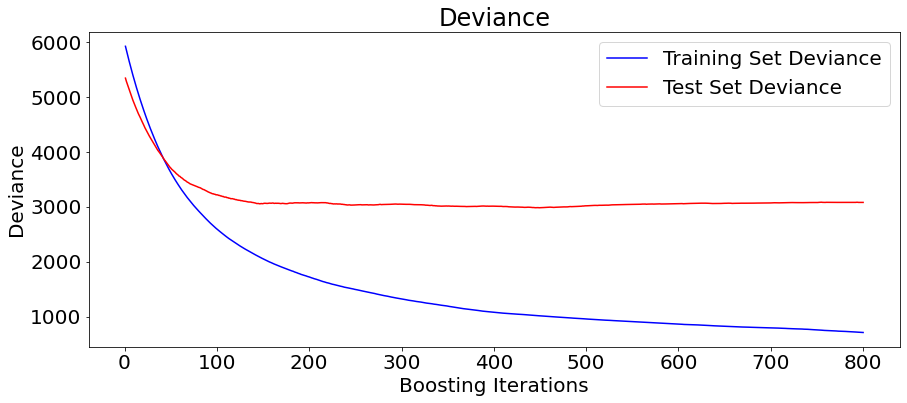

In [11]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

rcParams['font.size'] = 20
fig = plt.figure(figsize=(13, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

# Plot feature importance

In [12]:
"""
Be careful, impurity-based feature importances can be misleading for high cardinality features (many unique values).
As an alternative, the permutation importances of reg can be computed on a held out test set. See Permutation feature
importance for more details.
"""

'\nBe careful, impurity-based feature importances can be misleading for high cardinality features (many unique values).\nAs an alternative, the permutation importances of reg can be computed on a held out test set. See Permutation feature\nimportance for more details.\n'

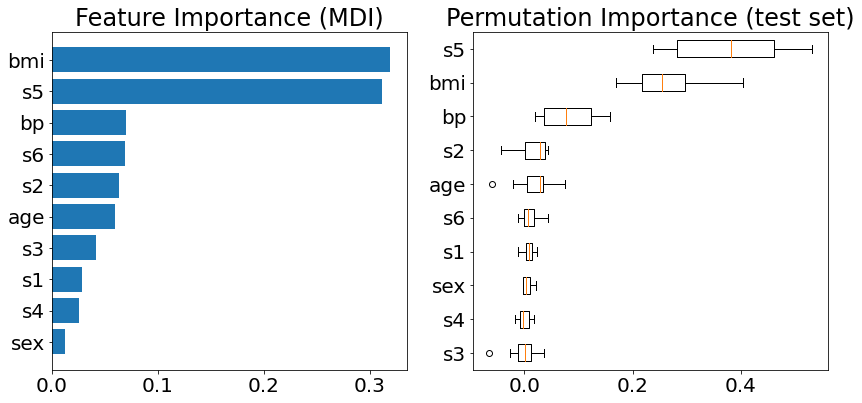

In [13]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(diabetes.feature_names)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [14]:
"""
For this example, the impurity-based and permutation methods identify the same 2 strongly predictive features 
but not in the same order. The third most predictive feature, “bp”, is also the same for the 2 methods. The 
remaining features are less predictive and the error bars of the permutation plot show that they overlap with 0.
"""

'\nFor this example, the impurity-based and permutation methods identify the same 2 strongly predictive features \nbut not in the same order. The third most predictive feature, “bp”, is also the same for the 2 methods. The \nremaining features are less predictive and the error bars of the permutation plot show that they overlap with 0.\n'

# Chacking cardinality

In [15]:
"""
Cardinality express the number of unique values for each feature.
"""

'\nCardinality express the number of unique values for each feature.\n'

In [16]:
values = []
for i in range(len(X[0])):
    dummy = []
    for j in range(len(X)):
        dummy.append(X[j][i])
    values.append(dummy)

In [17]:
from collections import Counter
for i in range(len(values)):
    print("Cardinality for: ", diabetes.feature_names[i], " is: ", len(list(set(values[i])) ))

Cardinality for:  age  is:  58
Cardinality for:  sex  is:  2
Cardinality for:  bmi  is:  163
Cardinality for:  bp  is:  100
Cardinality for:  s1  is:  141
Cardinality for:  s2  is:  302
Cardinality for:  s3  is:  63
Cardinality for:  s4  is:  66
Cardinality for:  s5  is:  184
Cardinality for:  s6  is:  56
